In [15]:
import napari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data, transform
from scipy.ndimage import affine_transform

In [2]:
image0 = data.camera()
image1 = transform.rotate(image0, 60)

viewer = napari.Viewer()
l0 = viewer.add_image(image0, colormap='green', blending='additive')
l1 = viewer.add_image(image1, colormap='magenta', blending='additive')

C:\Users\kmkedz\.conda\envs\napari-tests\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
C:\Users\kmkedz\.conda\envs\napari-tests\lib\site-packages\affinder\affinder.py:28: FutureWarning: Private attribute access ('Viewer._canvas_size') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  viewer.camera.zoom = np.min(viewer._canvas_size) / np.max(size)
C:\Users\kmkedz\.conda\envs\napari-tests\lib\site-packages\numpy\core\numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(

Using Affinder GUI:

1. Start affinder 
2. Select layers for 'reference' (image0) and 'moving'(image1)
3. model - 'similarity'
4. choose output file ('D:\test_mat.txt')
5. click points

In [3]:
p1 = viewer.layers['image0_pts'].data
p1

array([[144.92336549, 323.27277599],
       [166.32529475, 249.73794212],
       [129.0091104 , 186.08092176]])

In [4]:
p2 = viewer.layers['image1_pts'].data
p2

array([[142.72829582, 194.86120043],
       [214.06806002, 178.94694534],
       [251.38424437, 111.99732047]])

In [5]:
tf = transform.estimate_transform('similarity', p2, p1)

In [6]:
tf

<SimilarityTransform(matrix=
    [[  0.50871501,   0.87001028, -97.26286   ],
     [ -0.87001028,   0.50871501, 347.02615919],
     [  0.        ,   0.        ,   1.        ]]) at 0x1a00c180640>

In [7]:
test_mat = np.loadtxt(r'D:\test_mat.txt',delimiter=',')
test_mat

array([[  0.50871501,   0.87001028, -97.26286   ],
       [ -0.87001028,   0.50871501, 347.02615919],
       [  0.        ,   0.        ,   1.        ]])

tf is identical with the matrix saved by Affinder

In [8]:
im_alig = transform.warp(image1,tf)

In [9]:
viewer.add_image(im_alig, colormap='green', blending='additive')

<Image layer 'im_alig' at 0x1a00c180910>

## Testing scipy

In [10]:
def matrix_rc2xy(affine_matrix):
    swapped_cols = affine_matrix[:, [1, 0, 2]]
    swapped_rows = swapped_cols[[1, 0, 2], :]
    return swapped_rows

In [11]:
tf_swapped = matrix_rc2xy(test_mat)

In [12]:
im_alig_scipy = affine_transform(image1,tf_swapped)

In [13]:
viewer.add_image(im_alig_scipy, colormap='red', blending='additive')

<Image layer 'im_alig_scipy' at 0x1a004d825e0>

## Meantime in napari

In [16]:
im = imread(r'D:\capture.jpg')

<IPython.core.display.Javascript object>


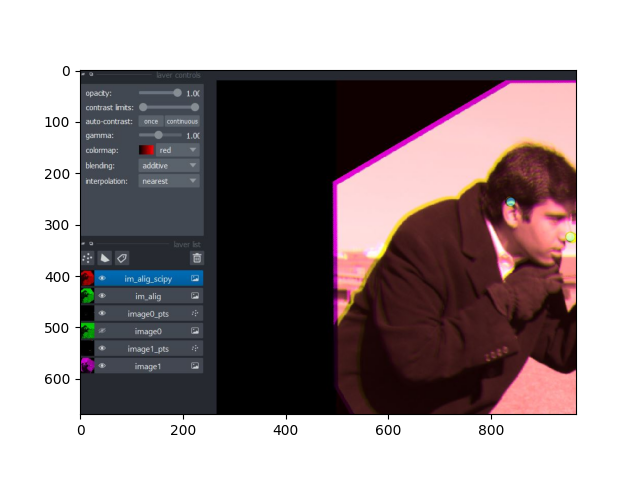

In [17]:
%matplotlib notebook
plt.imshow(im)